In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")
%matplotlib inline

from datetime import datetime
import time
import csv

results_2016 = pd.read_csv('./Runners_all_results_2016.csv', header = 0, encoding='latin-1')
results_2017 = pd.read_csv('./Runners_all_results_2017.csv', header = 0, encoding='latin-1')
results_2018 = pd.read_csv('./Runners_all_results_2018.csv', header = 0, encoding='latin-1')
results_2019 = pd.read_csv('./Runners_all_results_2019.csv', header = 0, encoding='latin-1', error_bad_lines=False)

b'Skipping line 26144: expected 20 fields, saw 21\n'


In [2]:
df = results_2019
df = df.append(results_2018, ignore_index = True)
df = df.append(results_2017, ignore_index = True)
df = df.append(results_2016, ignore_index = True)
original_headers = list(df.columns.values)
print(original_headers)

['BibNumber', 'FullName', 'SortName', 'AgeOnRaceDay', 'Gender', 'City', 'StateAbbrev', 'StateName', 'Zip', 'CountryOfResAbbrev', 'CountryOfResName', 'CountryOfCtzAbbrev', 'CountryOfCtzName', 'OfficialTime', 'RankOverall', 'RankOverGender', 'RankOverDivision', 'EventGroup', 'SubGroupLabel', 'SubGroup']


In [3]:
df

,BibNumber,FullName,SortName,AgeOnRaceDay,Gender,City,StateAbbrev,StateName,Zip,CountryOfResAbbrev,CountryOfResName,CountryOfCtzAbbrev,CountryOfCtzName,OfficialTime,RankOverall,RankOverGender,RankOverDivision,EventGroup,SubGroupLabel,SubGroup
0,2,Lawrence Cherono,"Cherono, Lawrence",30,M,Eldoret,NaN,NaN,NaN,KEN,Kenya,KEN,Kenya,2:07:57,1,1,1,Runners,NaN,NaN
1,6,Lelisa Desisa,"Desisa, Lelisa",29,M,Ambo,NaN,NaN,NaN,ETH,Ethiopia,ETH,Ethiopia,2:07:59,2,2,2,Runners,NaN,NaN
2,7,Kenneth Kipkemoi,"Kipkemoi, Kenneth",34,M,Eldoret,NaN,NaN,NaN,KEN,Kenya,KEN,Kenya,2:08:07,3,3,3,Runners,NaN,NaN
3,8,Felix Kandie,"Kandie, Felix",32,M,Iten,NaN,NaN,NaN,KEN,Kenya,KEN,Kenya,2:08:54,4,4,4,Runners,NaN,NaN
4,11,Geoffrey Kirui,"Kirui, Geoffrey",26,M,Keringet,NaN,NaN,NaN,KEN,Kenya,KEN,Kenya,2:08:55,5,5,5,Runners,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105511,31985,Tina M. Weidenkeller,"Weidenkeller, Tina M.",46,F,Rossmoor,CA,California,90720,USA,United States of America,USA,United States of America,7:47:56,26625,12164,1900,Runners,NaN,NaN
105512,26218,Jami E. Marseilles,"Marseilles, Jami E.",47,F,Huntington Beach,CA,California,92646,USA,United States of America,USA,United States of America,7:47:56,26626,12165,1901,Runners,MI,Mobility Impaired
105513,29403,William J. Ganem,"Ganem, William J.",39,M,Reedsburg,WI,Wisconsin,53959,USA,United States of America,USA,United States of America,8:23:27,26627,14462,4801,Runners,MI,Mobility Impaired
105514,30690,Daryl R. Farler,"Farler, Daryl R.",35,M,Franklin,TN,Tennessee,37069,USA,United States of America,USA,United States of America,8:25:09,26628,14463,4802,Runners,MI,Mobility Impaired


Text(0.5, 1.0, 'Participants per age group')

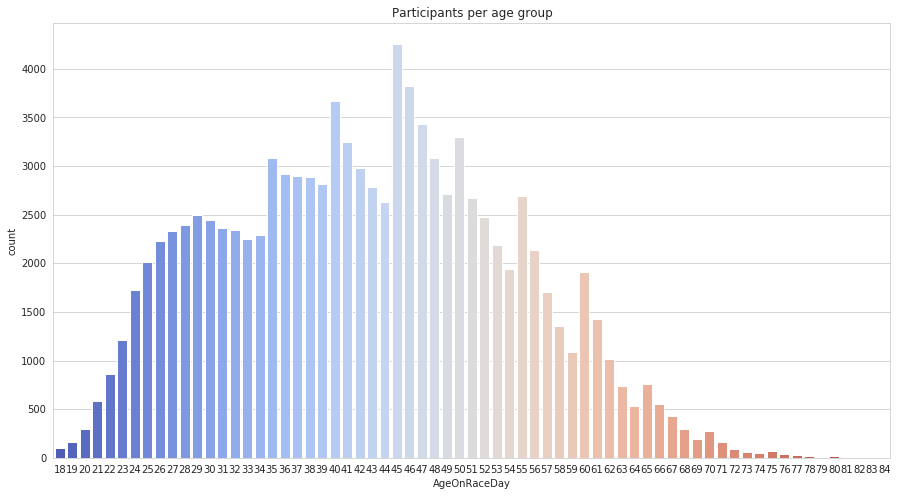

In [4]:
g = sns.countplot('AgeOnRaceDay', data=df, palette="coolwarm")
g.figure.set_size_inches(15,8)
g.set_title("Participants per age group")

In [5]:
df['OfficialTime'] = df['OfficialTime'].apply(lambda x: datetime.combine(datetime.min, datetime.strptime(x, '%H:%M:%S').time()) - datetime.min)

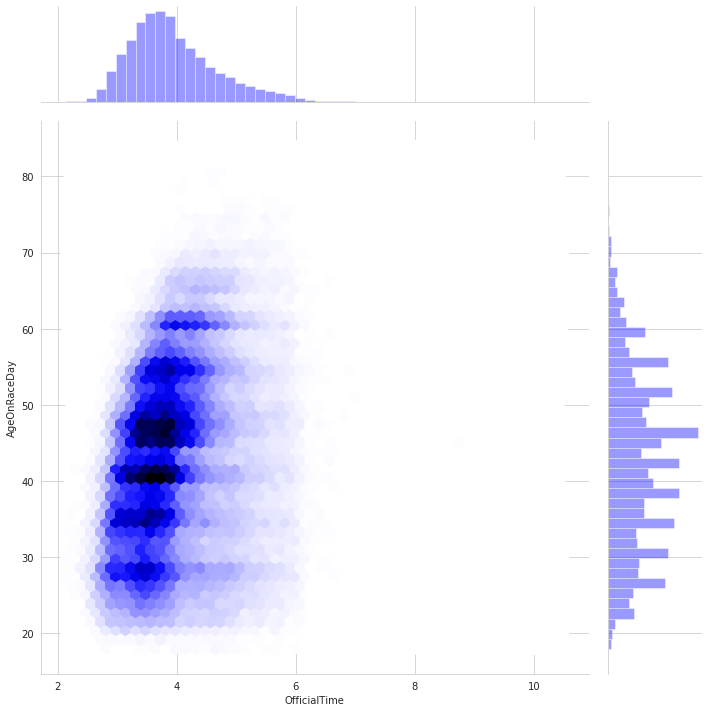

In [6]:
g = sns.jointplot( x=df['OfficialTime'].apply(lambda x: x.total_seconds()/3600), y=df['AgeOnRaceDay'], stat_func=None, kind='hex', color="b", height=10)

Text(0.5, 1.0, 'Distribution of finish times per Age group')

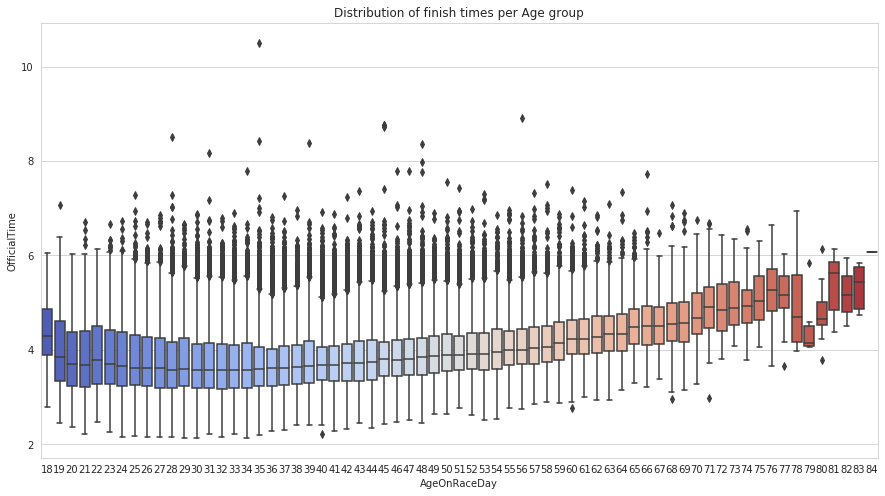

In [7]:
g = sns.boxplot(df['AgeOnRaceDay'], df['OfficialTime'].apply(lambda x: x.total_seconds()/3600), palette="coolwarm")
g.figure.set_size_inches(15,8)
g.set_title("Distribution of finish times per Age group")

Text(0.5, 1.0, 'Most popular Country')

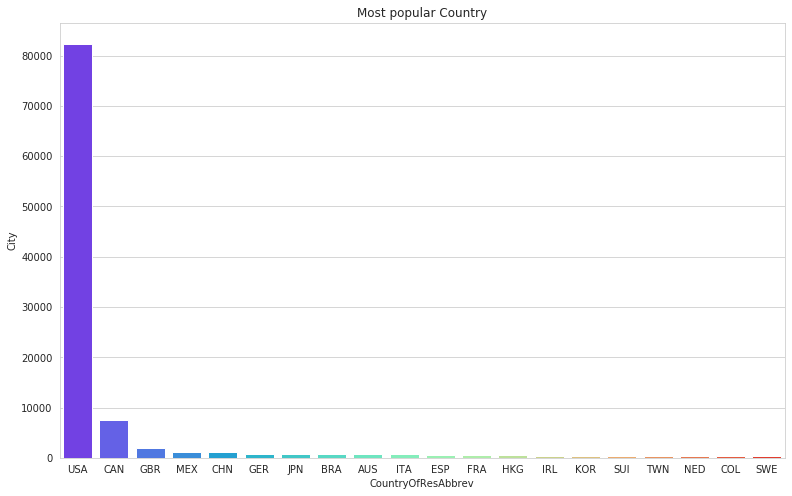

In [8]:
s = df.groupby('CountryOfResAbbrev').count()['City'].sort_values(ascending=False).head(20)
g = sns.barplot(s.index, s, palette='rainbow')
g.figure.set_size_inches(13,8)
g.set_title("Most popular Country")

Text(0.5, 1.0, 'Most popular Country (after US and Canada)')

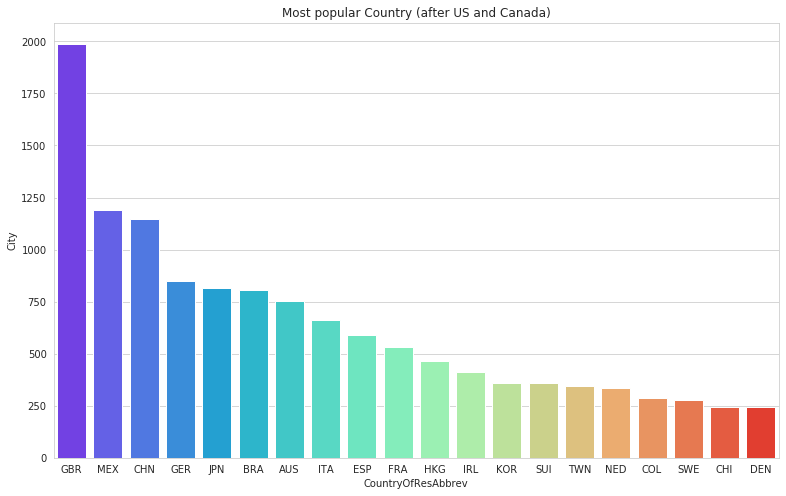

In [9]:
s = df.groupby('CountryOfResAbbrev').count()['City'].sort_values(ascending=False).head(22)[2:]
g = sns.barplot(s.index, s, palette='rainbow')
g.figure.set_size_inches(13,8)
g.set_title("Most popular Country (after US and Canada)")